#                     Modelo de prevención de Accidente Cerebro Vascular

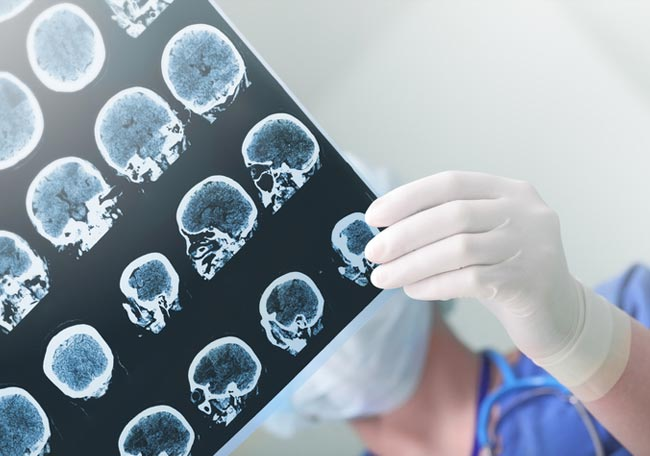

# Indice 

1. [Introducción](#1.Introducción)
2. [Data Wrangling](#2.Data-Wrangling)
3. [Análisis exploratorio de datos (EDA)](#3.Análisis-exploratorio-de-datos-(EDA))
4. [Modelado](#4.Modelado)
5. [Conclusiones](#5.Conclusiones)

# 1.Introducción

### Abstract

El accidente cerebrovascular (ACV) es una afección en la que el flujo sanguíneo al cerebro se interrumpe, causando daño cerebral y discapacidad.
Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular(ACV) es la segunda causa de muerte en todo el mundo, responsable de aproximadamente el 11 % del total de muertes.
Este conjunto de datos se utiliza para predecir si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. 
La predicción de ACV en base a los habitos de las personas, puede identificar patrones a evitar, para reducir al mínimo el riesgo de sufrir esta patólogía. Esto resulta provechoso no solo a nivel individual, sino tambien en el ahorro de recursos economicos que la sociedad destina a tratar esta enfermedad.


### Hipótesis
La incidencia de Accidente Cerebrovascular(ACV) no es un suceso azaroso sino que se produce por hábitos poco saludables e identificables.

### Objetivo
Encontrar patrones de comportamientos identificables que predisponen a una persona a sufrir ACV. Generar un modelo que prediga la probabilidad de una persona a sufrir un ACV.

### Contexto comercial
Los datos se obtuvieron del sitio web kaggle. No hay referencias de si fueron publicados en un articulo. 

Fuente: https://www.kaggle.com/code/ruthvikpvs/stroke-data-analysis-and-prediction/notebook

### Problema comercial
Dados ciertas varialbes que son de facil medición ¿Se puede predecir si una persona sufrirá un ACV?.

### Contexto analítico
Los datos fueron obtenidos de un centro de salud. El dataset cuenta de 11 caracteristicas clinicas que potencialmente podrian ser usadas en un modelo de predicción de ACV.

1) id: Identificador

2) gender: "Male", "Female" u "Other" 

3) age: edad del paciente

4) hypertension: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión 

5) heart_disease: 0 si el paciente no tiene enfermedades cardiovasculares, 1 si el paciente tiene enfermedades cardiovasculares 

6) ever_married: Si estuvo o no casado/a

7) work_type: El tipo de empleo 

8) Residence_type: Si vive en zona rural o urbana

9) avg_glucose_level: nivel medio de azúcar en sangre

10) bmi: indice de masa corporal

11) smoking_status: Si es fumador, ex-fumador, nunca fumo o no se tienen datos. 

12) stroke: 1 si el paciente sufrio ACV(ACV+) y 0 si no sufrio ACV(ACV-) 



## Importaciones y lectura del DataFrame

En primer lugar se realizan importaciones de librerias útiles y del Dataset que se usara a lo largo del proyecto.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# evita poner plt.show en los graficos de seaborn.
%matplotlib inline

In [36]:
# Se importa el dataset y se guarda en variable
raw_df_stroke = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQHKrR2P-CPVKCg6E__bUvgWYta9dEP14arcLTS24x2XgDR-IIWqzRiaUBcR4Ij1__Q2KXO-2sfeTwq/pub?output=csv')
df_stroke = raw_df_stroke.copy()

# 2.Data Wrangling

Posteriormente, se realizaron modificaciones en el dataset para trabajar de manera adecuada. En esta etapa se hizo una descripción estadística general del dataset, se modifican los valores necesarios y se buscan datos nulos o duplicados que puedan influir en los procesos posteriores del modelado.

In [37]:
# Se muestran los parametros estadísticos fundamentales
df_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [38]:
#se elimina la columna id porque no es relevante y el único conteo con género 'otro' por desbalancea el df
df_stroke.drop(columns=['id'],inplace=True) 
df_stroke.drop(index=df_stroke.index[df_stroke['gender'] == 'Other'], axis='index', inplace=True)

df_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [39]:
# Busco valores N/A
df_stroke.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [40]:
df_stroke.shape

(5109, 11)

In [41]:
# Reemplazo cada N/A con el promedio de los valores de bmi
df_stroke.fillna(df_stroke['bmi'].mean(), inplace=True)


In [42]:
# Busco valores duplicados en el dataframe.
df_stroke.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5109, dtype: bool

# 3.Análisis exploratorio de datos (EDA)

Para continuar con el análisis, se realizó un análisis exploratorio de datos(EDA), que consiste en trazar gráficas para generar un primer estudio sobre nuestro dataset. En esta instancia se buscan patrones, correlación entre variables y el entendimiento general del dataset.


In [43]:
# Hago un dataframe de gente ACV+
stroked = df_stroke[df_stroke['stroke'] == 1]

### Influencia del tipo de trabajo en población ACV+

Los trabajos que implican estrés y largas horas de trabajo también pueden aumentar el riesgo de ACV. El estrés crónico puede afectar negativamente la salud cardiovascular y aumentar la presión arterial y los niveles de colesterol, lo que a su vez aumenta el riesgo de ACV. Las largas horas de trabajo pueden aumentar el riesgo de enfermedades cardíacas y ACV debido a la falta de tiempo para hacer ejercicio y la falta de sueño.
**¿Es el trabajo un factor que influye en la incidencia de ACV?**


[Text(0, 0, 'Privado'),
 Text(1, 0, 'Independiente'),
 Text(2, 0, 'Gobierno'),
 Text(3, 0, 'Niños')]

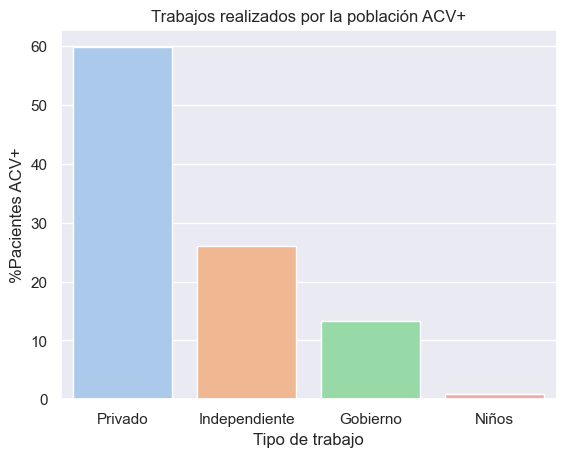

In [44]:
# Hago dataset de ACV+ provisorio eliminando la poblacion que nunca trabajó
z = stroked.drop(stroked[stroked['work_type'] == 'Never_worked'].index)

#Divido trabajo realizado sobre el total de población ACV+
x = stroked['work_type'].unique()
y = (stroked['work_type'].value_counts()/z['work_type'].count())*100

# Grafico porcentaje de ACV+ normalizado respecto al n total del estudio
g = sns.barplot(x=x, y=y, palette='pastel')
g.set(title='Trabajos realizados por la población ACV+', ylabel ='%Pacientes ACV+', xlabel='Tipo de trabajo')
g.set_xticklabels(['Privado', 'Independiente', 'Gobierno', 'Niños'])



La mayor parte de la población ACV+ trabajaba en el sector privado.

### Influencia del tipo de residencia, estado civíl y género en población ACV+.

Se puede hipotetizar que el tipo de residencia puede influir en la incidencia de ACV+; el ritmo de vida de las grandes ciudades podria conllevar más estrés para la población, aumenta el riesgo de la enfermedad. Por otro lado, la vida rural, si bien puede ser más tranquila, tiene menos facilidad para la atención hospitalaria.
Además, se sabe que los seres humanos somos seres sociales. Por esto, el vivir en pareja puede ser un factor fundamental en los sucesos de ACV+.
Finalmente, el género biológico puede ser un factor influyente en la enfermedad por ejemplo, por factores genéticos diferenciaes entre varones y mujeres.
Por las razones previamente enumeradas, se optó por graficar las proporciones de estas categorias dentro de la población ACV+.


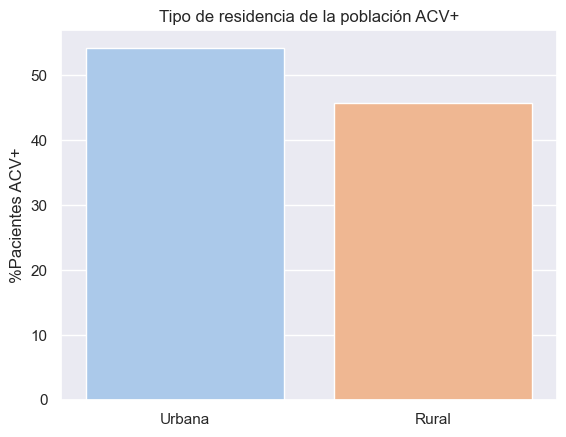

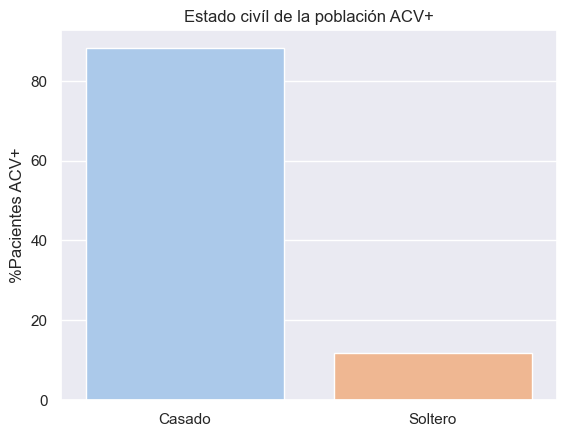

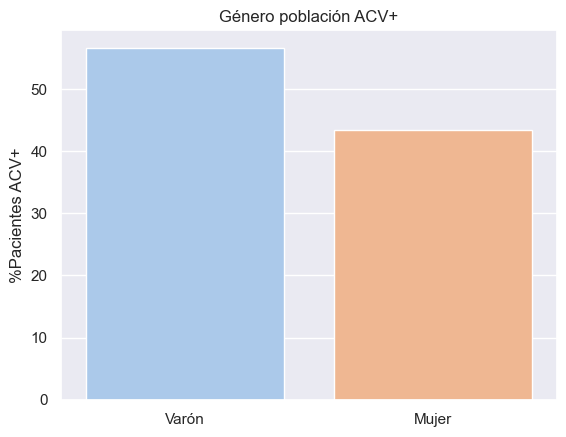

In [45]:
for f in ['Residence_type','ever_married','gender']:
    x = stroked[f].unique()
    y = stroked[f].value_counts()/z[f].count()*100
    g = sns.barplot(x=x, y=y, palette='pastel')
    
    if f == 'Residence_type':
        g.set(title='Tipo de residencia de la población ACV+', ylabel ='%Pacientes ACV+')
        g.set_xticklabels(['Urbana', 'Rural'])
    elif f == 'ever_married':
        g.set(title='Estado civíl de la población ACV+', ylabel ='%Pacientes ACV+')
        g.set_xticklabels(['Casado', 'Soltero'])
    else:
        g.set(title='Género población ACV+', ylabel ='%Pacientes ACV+')
        g.set_xticklabels(['Varón', 'Mujer'])
    
    plt.show()


Se analizó y comprobo que la residencia de la mayoria de la población ACV+ se localiza en urbes, que el estado civil de la población es mayoritariamente casada y que son de género masculino. Por esto, se decidió incluir estas variables dentro del modelo de predicción.


### ¿Hay correlación lineal entre variables?

Se analizó la correlación lineal entre variables del DataFrame. Esto muestra si una variable cambia su valor en función de otra. Si esto sucede, podemos decir que estas variables estan relacionadas linealmente. Este tipo de correlación entre variables no es la única.

In [46]:
# Mostramos la correlación entre variables
stroke_mx = df_stroke.corr()
stroke_mx

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.325861,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.160151,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.038865,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.168913,0.131991
bmi,0.325861,0.160151,0.038865,0.168913,1.000000,0.038917
stroke,0.245239,0.127891,0.134905,0.131991,0.038917,1.000000


<Figure size 800x600 with 0 Axes>

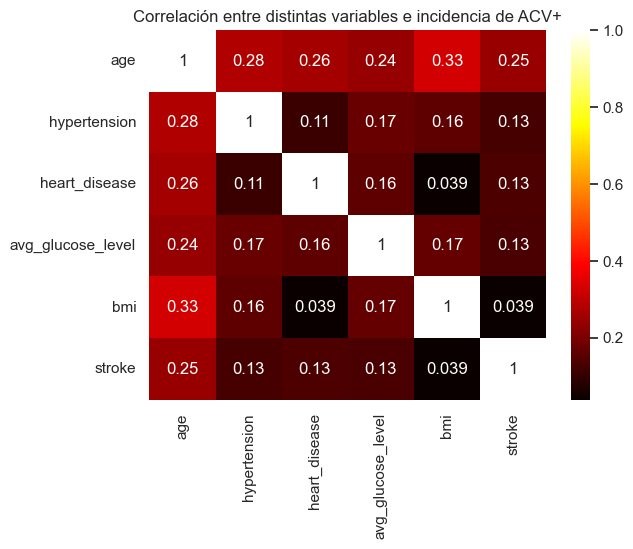

<Figure size 800x600 with 0 Axes>

In [47]:
g3 = sns.heatmap(stroke_mx, annot=True, cmap='hot')
g3.set(title='Correlación entre distintas variables e incidencia de ACV+')
plt.figure(figsize=(8,6))

En principio, no pareceria haber una correlación lineal significativa engtre dos varialbles. Cabe aclarar que esta no es el único tipo de correlación. Por otro lado, es posible que haya una correlación entre muchas variables cuando se consideran juntas, pero que no haya una correlación evidente cuando se analizan individualmente.

### ¿A que edad hay más incidencia de ACV?

La edad podria influir en la enfermedad. Esto se debe en parte a que con la edad, las arterias se vuelven más rígidas y estrechas, lo que aumenta el riesgo de coágulos sanguíneos y otras condiciones que pueden causar un ACV.
Además, otros factores de riesgo relacionados con la edad, como la presión arterial alta, la diabetes y la enfermedad cardíaca, también pueden aumentar el riesgo de sufrir un ACV.

[Text(0.5, 1.0, 'Edad de pacientes ACV+'),
 Text(0, 0.5, 'Nro de pacientes ACV+'),
 Text(0.5, 0, 'Edad')]

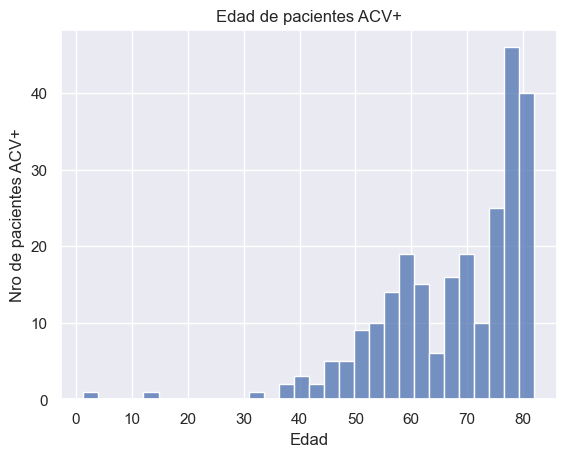

In [48]:
g4 = sns.histplot(stroked, x='age', bins=30, palette='pastel')
g4.set(title='Edad de pacientes ACV+', ylabel ='Nro de pacientes ACV+', xlabel='Edad')

Se ve una clara dependencia de la edad con la incidencia de ACV. En particular, la incidencia de ACV se duplica entre los 70 y los 80 años. Esta variable tambien sera tenida en cuenta para el modelo de predicción.

### ¿Hay relación entre fumar y la incidencia de ACV?

Fumar podria aumentar el riesgo de sufrir un ACV debido a que contribuye al desarrollo de enfermedades vasculares, como la aterosclerosis (acumulación de placa en las arterias), que pueden bloquear o estrechar las arterias cerebrales. También puede aumentar la presión arterial, lo que también es un factor de riesgo para el ACV.

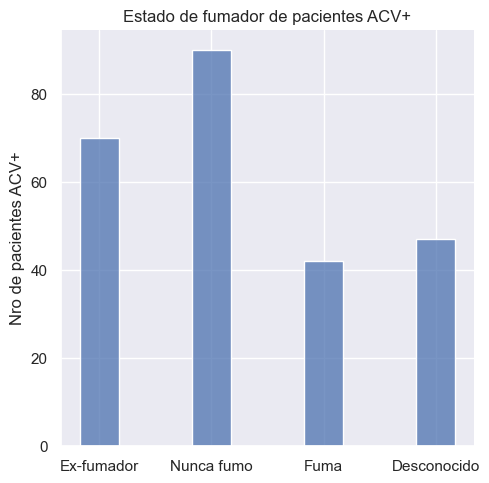

In [49]:
g5 = sns.displot(data=stroked, x='smoking_status', shrink=.35, palette='pastel')
g5.set(title='Estado de fumador de pacientes ACV+', ylabel ='Nro de pacientes ACV+', xlabel='' )
g5.set_xticklabels(["Ex-fumador", "Nunca fumo", "Fuma", "Desconocido"])

Si bien la mayor parte la mayor población ACV+ nunca fumo, no se puede descartar la relación entre fumar y la incidencia de ACV. La correlación entre fumar y la incidencia de ACV esta reportada en bibliografia (https://doi.org/10.1586/erc.10.56), por lo que se decidió incorporar este variable al modelo.

### ¿Hay relación entre los niveles medios de azúcar en sangre y la incidencia de ACV?

La hiperglucemia crónica puede dañar los vasos sanguíneos y aumentar la formación de placas en las arterias, lo que aumenta la probabilidad de obstrucciones y coágulos que pueden provocar un ACV. Además, la hiperglucemia crónica también puede aumentar la inflamación en el cuerpo, lo que a su vez puede aumentar el riesgo de enfermedades cardiovasculares, incluido el ACV.
 Para comprobar si hay un relación entre el nivel de azúcar en sangre y la incidencia de ACV, se grafico el nivel promedio de azúcar de la población ACV+ y la ACV-.
 
 **Un nivel normal de azúcar en sangre en ayunas para una persona adulta es generalmente de 70 a 99 mg/dL**. 

[Text(0, 0, 'ACV-'), Text(1, 0, 'ACV+')]

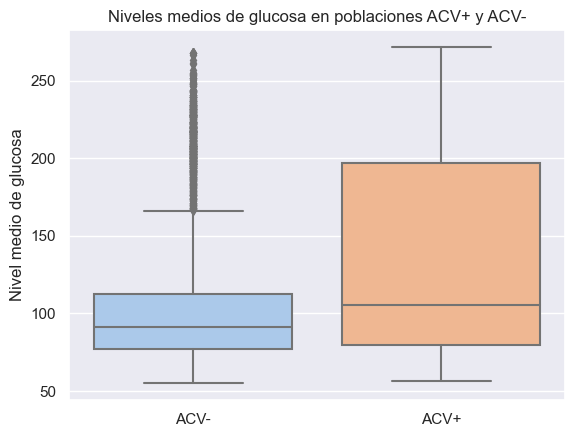

In [50]:
g6 = sns.boxplot(data=df_stroke, x='stroke', y='avg_glucose_level', palette='pastel') 
g6.set(title='Niveles medios de glucosa en poblaciones ACV+ y ACV-', ylabel ='Nivel medio de glucosa', xlabel='' )
g6.set_xticklabels(['ACV-', 'ACV+'])

Parece haber una tendencia a mayores niveles de azucar en la población ACV+, si bien en la poblacón ACV- se ven muchos outliers por encima del tercer cuartil.

### ¿Hay relación entre el indice de masa corporal y la incidencia de ACV?
Otra de las variables que podria estar relacionada con la incidencia de ACV es el indice de masa corporal(BMI). El índice de masa corporal (IMC) se utiliza comúnmente como una medida para evaluar si una persona tiene un peso saludable en relación con su altura. Se calcula dividiendo el peso de una persona en kilogramos por el cuadrado de su altura en metros.  

**Un IMC entre 18,5 y 24,9 se considera saludable para adultos**.

[Text(0, 0, 'ACV-'), Text(1, 0, 'ACV+')]

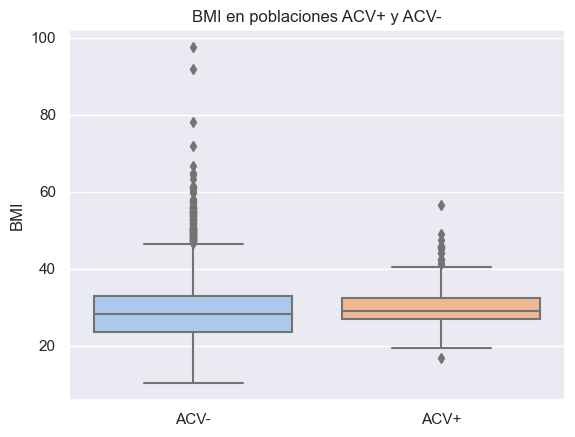

In [51]:
g7 = sns.boxplot(x='stroke', y='bmi', data=df_stroke, palette='pastel')
g7.set(title='BMI en poblaciones ACV+ y ACV-', ylabel ='BMI', xlabel='')
g7.set_xticklabels(['ACV-', 'ACV+'])

Hay una ligera tendencia de un mayor BMI en la mediana del grupo que sufrio ACV. Igualmente, esta diferencia esta dentro de los cuartiles del grupo sin ACV por lo que podria no ser estadisticamente significativo.

## Insights del EDA

Se realizó un análisis de datos exploratorio a un Dataset de datos etiquetados de pacientes ACV+ y ACV-. Se graficó la distribución de categorias en la población ACV+. Las variables a tener en cuenta para el modelo son las sigientes:


✔️ Estado civil

✔️ Lugar de residencia

✔️ Género

✔️ Condición de Fumador/a

✔️ Edad

✔️ Tipo de trabajo

✔️ Índice de masa corporal

✔️ Niveles de azúcar en sangre






# 4.Modelado

Posteriormente, se prosiguio con la generación de diversos modelos de predicción, que incorporen las variables seleccionadas dentro del algoritmo de predicción. Al ser la variable objetivo(Y) es decir, el resultado de si el paciente tiene o no ACV, del tipo categórica (si o no), se debieron emplear modelos que se ajusten a este tipo de variables

Se eligieron los siguientes modelos:

✔️ Regresión logística: Se utiliza para predecir una variable categórica binaria (dos categorías) en función de una o más variables predictoras

✔️ K-Nearest Neighbors (k-NN): Utiliza una función de distancia para encontrar los k observaciones más cercanas a un nuevo caso y clasificarlo en función de la mayoría de las categorías de los k vecinos más cercanos.

   
    

In [52]:
# Se elimina la columna genero porque no afecta al modelo
df_stroke.drop(['gender'], axis=1, inplace=True)

### Conversión de variables categóricas a numéricas

Para la correcta aplicación del modelo, se deben pasar las variables categoricas a variables númericas, que representen esta categorias con valores binarios

In [53]:
# Se conviertes variables a númericas
df_stroke = pd.get_dummies(df_stroke, columns=['smoking_status', 'ever_married', 'work_type', 'Residence_type'])
df_stroke

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,67.0,0,1,228.69,36.60000,1,0,1,0,0,0,1,0,0,1,0,0,0,1
1,61.0,0,0,202.21,28.89456,1,0,0,1,0,0,1,0,0,0,1,0,1,0
2,80.0,0,1,105.92,32.50000,1,0,0,1,0,0,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.40000,1,0,0,0,1,0,1,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.00000,1,0,0,1,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.89456,0,0,0,1,0,0,1,0,0,1,0,0,0,1
5106,81.0,0,0,125.20,40.00000,0,0,0,1,0,0,1,0,0,0,1,0,0,1
5107,35.0,0,0,82.99,30.60000,0,0,0,1,0,0,1,0,0,0,1,0,1,0
5108,51.0,0,0,166.29,25.60000,0,0,1,0,0,0,1,0,0,1,0,0,1,0


In [54]:
X = df_stroke.drop(columns='stroke')    
y = df_stroke['stroke']
# Muestro las variables dependientes
X.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban'],
      dtype='object')

Seleccionamos la variable objetivo(y) y las variables independientes(X).

In [55]:
# Importo módulos y librerias necesarios
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample

import sys
import joblib

# defino un modo que le falta
sys.modules['sklearn.externals.joblib'] = joblib

import warnings
warnings.filterwarnings('ignore')

[Text(0, 0, 'ACV-'), Text(1, 0, 'ACV+')]

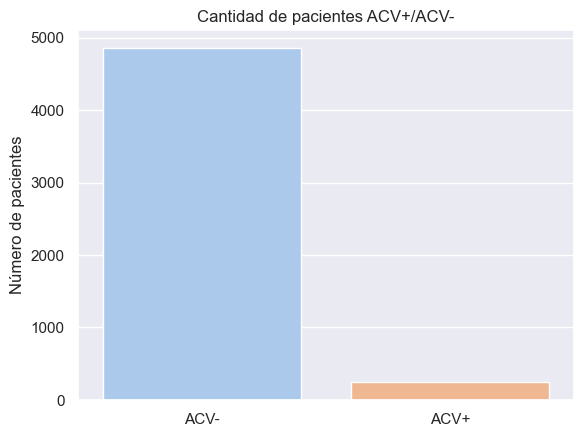

In [56]:
g8 = sns.countplot(data=df_stroke, x='stroke', palette='pastel')
g8.set(title='Cantidad de pacientes ACV+/ACV-', ylabel ='Número de pacientes', xlabel='')
g8.set_xticklabels(['ACV-', 'ACV+'])


In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


[Text(0, 0, 'ACV-'), Text(1, 0, 'ACV+')]

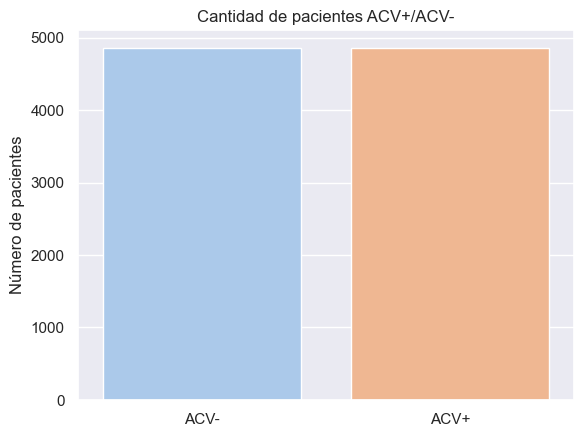

In [58]:
g = sns.countplot( x=y_resampled, palette='pastel')
g.set(title='Cantidad de pacientes ACV+/ACV-', ylabel ='Número de pacientes', xlabel='')
g.set_xticklabels(['ACV-', 'ACV+'])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=2, shuffle=True)

In [60]:
# subo iteraciones del modelo pq sino no anda. La otra es normalizar o escalar data
log_reg = LogisticRegression(max_iter=1000)

### Regresión Logística

La regresión logística es un tipo de modelo estadístico que se utiliza para analizar la relación entre una variable dependiente binaria (es decir, que toma dos valores posibles, como "sí" o "no", "verdadero" o "falso", etc.) y una o más variables independientes continuas o categóricas.

El objetivo del modelado por regresión logística es predecir la probabilidad de que la variable dependiente binaria tome uno de los dos valores posibles, dadas las variables independientes.

In [61]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Evaluación del modelo

In [62]:
y_pred = log_reg.predict(X_test)

##### F1 score del modelo
El F1 score es una métrica comúnmente utilizada para evaluar la precisión de un modelo de clasificación.

In [63]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("El f1 score del modelo es:", f1)

El f1 score del modelo es: 0.9482386772106398


##### Recall del modelo
El recall es una métrica comúnmente utilizada para evaluar el rendimiento de un modelo de clasificación. El recall se define como la proporción de verdaderos positivos (TP) que se identifican correctamente entre todos los verdaderos positivos y falsos negativos (FN) en el conjunto de datos

In [64]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("El recall es:", recall)

El recall es: 0.9090282563749138


Matriz de confusión:
[[1453   12]
 [ 132 1319]]


[Text(0, 0.5, 'ACV-'), Text(0, 1.5, 'ACV+')]

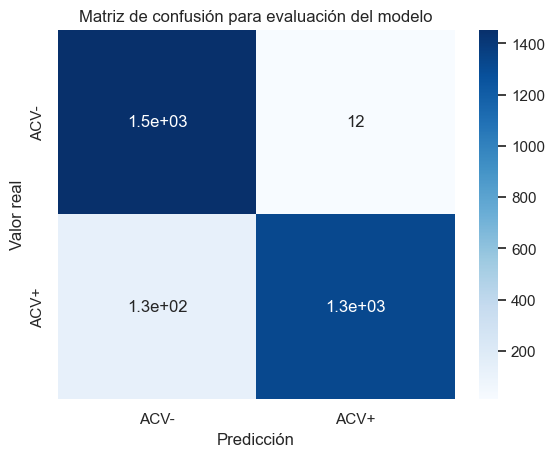

In [65]:
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
confusion_mtx = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_mtx)

g = sns.heatmap(confusion_mtx, annot=True, cmap='Blues')
g.set(title='Matriz de confusión para evaluación del modelo', ylabel ='Valor real', xlabel='Predicción')
g.set_xticklabels(['ACV-', 'ACV+']) 
g.set_yticklabels(['ACV-', 'ACV+'])

### k-Nearest Neightbors (k-NN)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

# Crear una instancia del modelo KNN con k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

# Predecir las etiquetas de clase para los datos de prueba
y_pred = knn.predict(X_test)

# Imprimir la precisión del modelo en los datos de prueba
print("Precisión del modelo: {:.2f}".format(knn.score(X_test, y_test)))

Precisión del modelo: 0.90
